<a href="https://colab.research.google.com/github/Sidhartht1607/flight-delay-risk-system/blob/main/flight_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✈️ Flight Delay Analytics & Prediction (Q1 2025)

### Goal
Build a machine learning model to predict whether a flight will be delayed (≥15 minutes) using U.S. DOT flight data for January–March 2025. Alongside prediction, uncover operational patterns, root causes of delays, and propose data-driven recommendations for airline performance optimization.

### Key Business Questions
1. Which airports, routes, and carriers show highest disruption risk?
2. What operational and scheduling factors most contribute to delays?
3. Can we predict flight delay risk ahead of departure time?
4. What recurring patterns exist in Q1 flight delay trends?
5. Which changes could improve on-time performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_jan=pd.read_csv("flight_jan.csv")

## Importing data from Bureau of Transportation Statistics

In [3]:
df_jan.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [4]:
df_feb=pd.read_csv("flight_feb.csv")
df_feb.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [5]:
df_mar=pd.read_csv("flight_mar.csv")
df_mar.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [6]:
print(set(df_jan.columns) - set(df_feb.columns))
print(set(df_feb.columns) - set(df_jan.columns))
print(set(df_jan.columns) - set(df_mar.columns))
print(set(df_mar.columns) - set(df_jan.columns))

set()
set()
set()
set()


In [7]:
df_jan['FL_DATE'].describe()

,FL_DATE
count,539747
unique,31
top,1/5/2025 12:00:00 AM
freq,19676


Let join all the tables

In [8]:
df = pd.concat([df_jan,df_feb,df_mar],ignore_index=True)

In [9]:
df['FL_DATE'].max(),df['FL_DATE'].min()

('3/9/2025 12:00:00 AM', '1/1/2025 12:00:00 AM')

In [10]:
df_jan['DAY_OF_MONTH'].max(),df_feb['DAY_OF_MONTH'].max(),df_mar['DAY_OF_MONTH'].max()

(31, 28, 31)

In [11]:
df['FL_DATE']=pd.to_datetime(df['FL_DATE'])

/tmp/ipython-input-2801850585.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FL_DATE']=pd.to_datetime(df['FL_DATE'])


In [12]:
df['FL_DATE'].max(), df['FL_DATE'].min()


(Timestamp('2025-03-31 00:00:00'), Timestamp('2025-01-01 00:00:00'))

### Sanity checks





In [13]:
df['MONTH'].value_counts()

,count
MONTH,
3,600872
1,539747
2,504884


In [14]:
df.FL_DATE.dtype #object type

dtype('<M8[ns]')

In [15]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [16]:
df = df.rename(columns={"DAY_OF_MONTH": "DAY"})

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'fl_date', 'op_unique_carrier',
       'op_carrier', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [19]:
df["flight_date"] = pd.to_datetime(
    df[["year", "month", "day"]]
)

In [20]:
df.groupby("month")['day'].max()

,day
month,
1,31
2,28
3,31


In [21]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'fl_date', 'op_unique_carrier',
       'op_carrier', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'flight_date'],
      dtype='object')

In [22]:
df.drop(columns=["fl_date"], inplace=True)

### 1. Delay characterizations


### Donut function

In [23]:
#piechart function
def plot_donut(data,cols=['r','b'],explode=(0.05,0.1),labels=['not_cancelled','cancelled'], title=''):
  explode = (0.05, 0.1)
  plt.pie(data, colors=['r','b'], labels=labels,
          autopct='%1.1f%%', pctdistance=0.85,
          explode=explode)

  # draw circle
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()

  # Adding Circle in Pie chart
  fig.gca().add_artist(centre_circle)

  # Adding Title of chart
  plt.title(title)

  # Displaying Chart
  plt.show()

Cancelled flights percentage

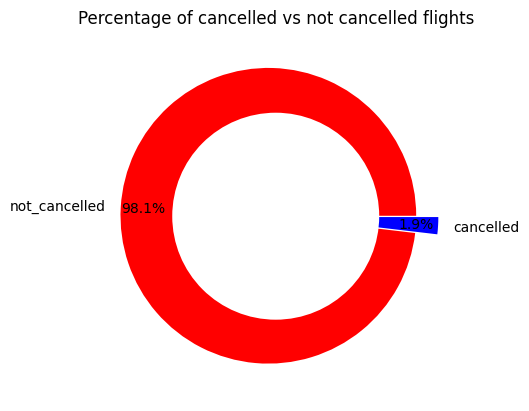

In [24]:
cancelled_flights = df['cancelled'].mean() * 100
not_cancelled_flights = 100 - cancelled_flights
not_cancelled_flights, cancelled_flights

plot_donut([not_cancelled_flights,cancelled_flights],title="Percentage of cancelled vs not cancelled flights")

We checked the number of flights that are cancelled because we might get a lot missing values because the cancelled flights are there. Lets check diverted flights as well

Diverted_flights percentage

99.76803445511798 0.23196554488202087


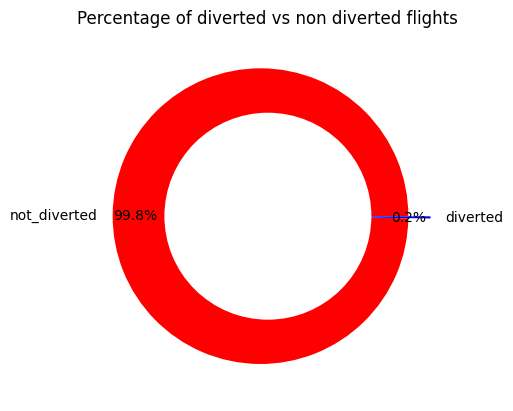

In [25]:
diverted_flights=df['diverted'].mean()*100
not_diverted_flights = 100 - diverted_flights
print(not_diverted_flights, diverted_flights)

plot_donut(data=[not_diverted_flights,diverted_flights],labels=['not_diverted','diverted'],title="Percentage of diverted vs non diverted flights")

Lets check how these cancelled flights are affecting other columns. I suspect the data would be null.

In [26]:
print("cancelled_total",len(df[df['cancelled']==1])) ## there are about 30640 cancelled flight in 3 months
df_cancelled=df[df['cancelled']==1]

cancelled_total 30640


In [27]:
df_1=df[(df['dep_del15'].isna()) & (df['cancelled']==1)]
print("number of late departures by 15 mins: ",len(df_1))

number of late departures by 15 mins:  29671


Here it shows that there are about 29671 flights that have not departed which makes sense but the problem is that this should be the same as the number of cancelled flights. We can assume that the the flight had departed and then got cancelled.

	•	DEP_TIME confirms whether departure was initiated
	•	DEP_DELAY quantifies how late that initiation occurred
	•	TAXI_OUT shows whether the aircraft progressed beyond gate departure

In [28]:
print("cancelled_total",len(df[df['cancelled']==1])) ## there are about 30640 cancelled flight in 3 months
df_cancelled=df[df['cancelled']==1]
df_1=df[(df['dep_del15'].isna()) & (df['cancelled']==1)]
print("number of late departures by 15 mins and cancelled: ",len(df_1))
print("dep_delay cancelled and deptime15 is na: ",df_1['dep_delay'].isna().sum())
print("dep_time cancelled and deptime15 is na: ",df_1['dep_time'].isna().sum())
print("taxi_out cancelled and deptime15 is na: ",df_1['taxi_out'].isna().sum())
print("dep_delay and cancelled: ",df_cancelled['dep_delay'].isna().sum())
print("dep_time and cancelled: ",df_cancelled['dep_time'].isna().sum())
print("taxi_out_cancelled: ",df_cancelled['taxi_out'].isna().sum())

cancelled_total 30640
number of late departures by 15 mins and cancelled:  29671
dep_delay cancelled and deptime15 is na:  29671
dep_time cancelled and deptime15 is na:  29560
taxi_out cancelled and deptime15 is na:  29671
dep_delay and cancelled:  29671
dep_time and cancelled:  29560
taxi_out_cancelled:  30401


In [29]:
#Number of flights where the departure began but got cancelled:
print("Number of flights where the taxing began but got cancelled",len(df[df['cancelled']==1])-df_cancelled['taxi_out'].isna().sum())
print("Number of flights where the departure from gate began but got cancelled",len(df[df['cancelled']==1])-df_cancelled['dep_time'].isna().sum())
print("Number of flights where the departure from gate was delayed but got cancelled",len(df[df['cancelled']==1])-df_cancelled['dep_delay'].isna().sum())

Number of flights where the taxing began but got cancelled 239
Number of flights where the departure from gate began but got cancelled 1080
Number of flights where the departure from gate was delayed but got cancelled 969


Because the delay events are not measured normally when the flights have been cancelled itself we will remove them for now. It can happen to any number of factors for example weather problems or operation/technical discrepencies

In [30]:
(df['dep_del15'].isna()).sum()

np.int64(29671)

In [31]:
len(df[(df['dep_del15'].isna()) & (df['cancelled']==1)])

29671

 What percentage of flights are delayed at departure?

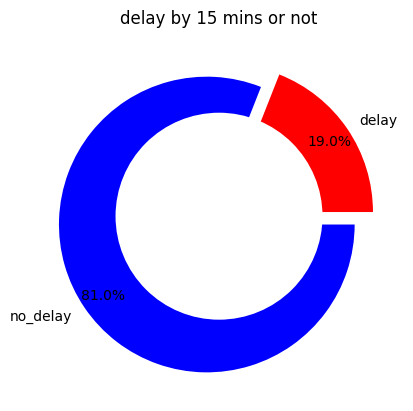

In [32]:
delay_rate = df['dep_del15'].mean() * 100
on_time_rate = 100 - delay_rate

data=delay_rate, on_time_rate
plot_donut(data,labels=["delay","no_delay"],title="delay by 15 mins or not")

<Axes: xlabel='flight_date', ylabel='Count'>

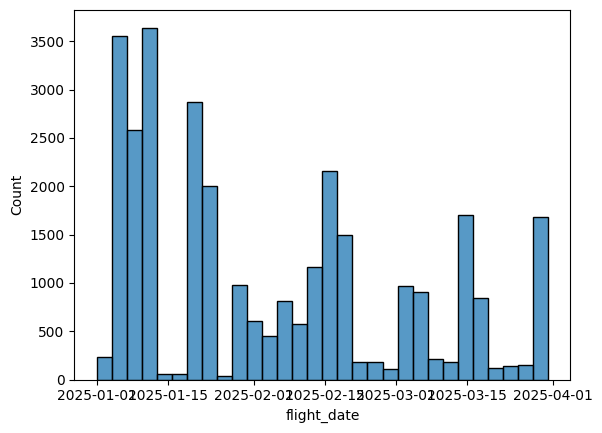

In [33]:
sns.histplot(data=df_cancelled, x="flight_date", bins=30)

In [44]:
df_flight_unique=df_cancelled.groupby(['flight_date'])['cancelled'].sum()
df_flight_unique

,cancelled
flight_date,
2025-01-01,36.0
2025-01-02,92.0
2025-01-03,102.0
2025-01-04,228.0
2025-01-05,1458.0
...,...
2025-03-27,45.0
2025-03-28,81.0
2025-03-29,65.0


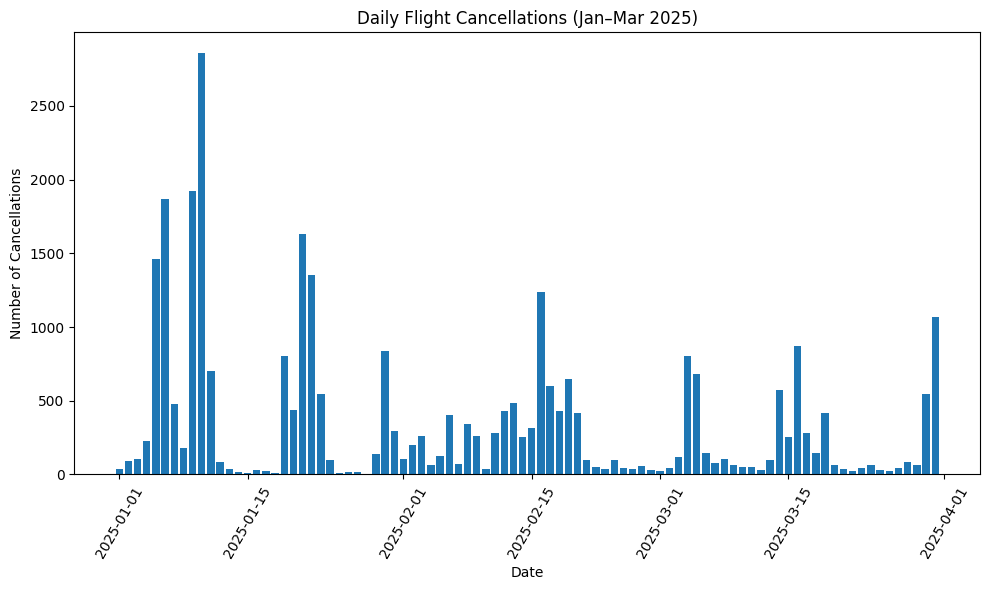

In [50]:
plt.figure(figsize=(10,6))
plt.bar(df_flight_unique.index,df_flight_unique.values)
plt.title("Daily Flight Cancellations (Jan–Mar 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

This shows that there are more cancellations at the beginning of the year.